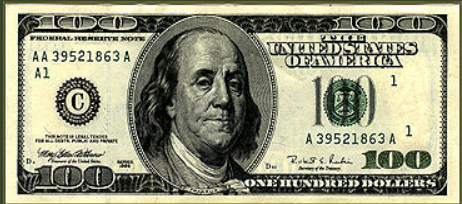

In [ ]:
# !pip install pyforest

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from pyforest import *

In [7]:
# lazy_imports()
# installs all the necessary libraries when needed

In [8]:
df = pd.read_csv('BankNote_Authentication.csv')

<IPython.core.display.Javascript object>

In [9]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [11]:
df.shape

(1372, 5)

<IPython.core.display.Javascript object>

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

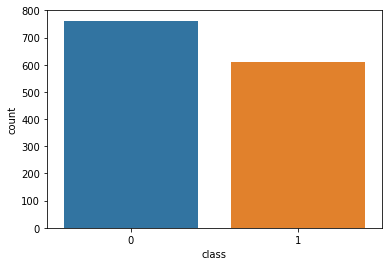

In [15]:
sns.countplot(df['class'])

In [16]:
# check of there are any null values
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

array([[<AxesSubplot:title={'center':'variance'}>,
        <AxesSubplot:title={'center':'skewness'}>,
        <AxesSubplot:title={'center':'curtosis'}>],
       [<AxesSubplot:title={'center':'entropy'}>,
        <AxesSubplot:title={'center':'class'}>, <AxesSubplot:>]],
      dtype=object)

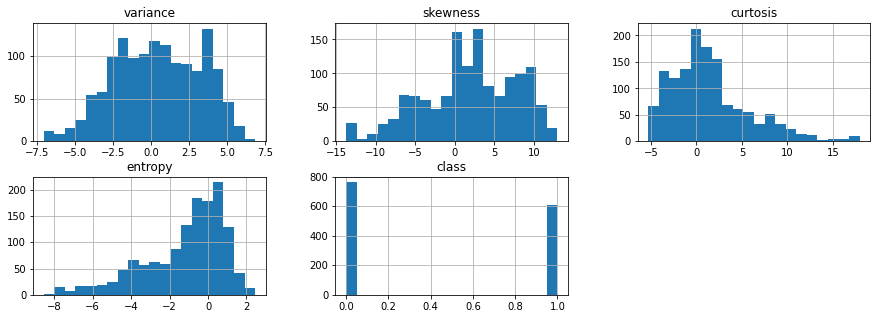

In [20]:
df.hist(bins=20, figsize=(15,5), layout=(2,3))

In [21]:
# curtosis is positively skewed and entropy is negatively skewed

<IPython.core.display.Javascript object>

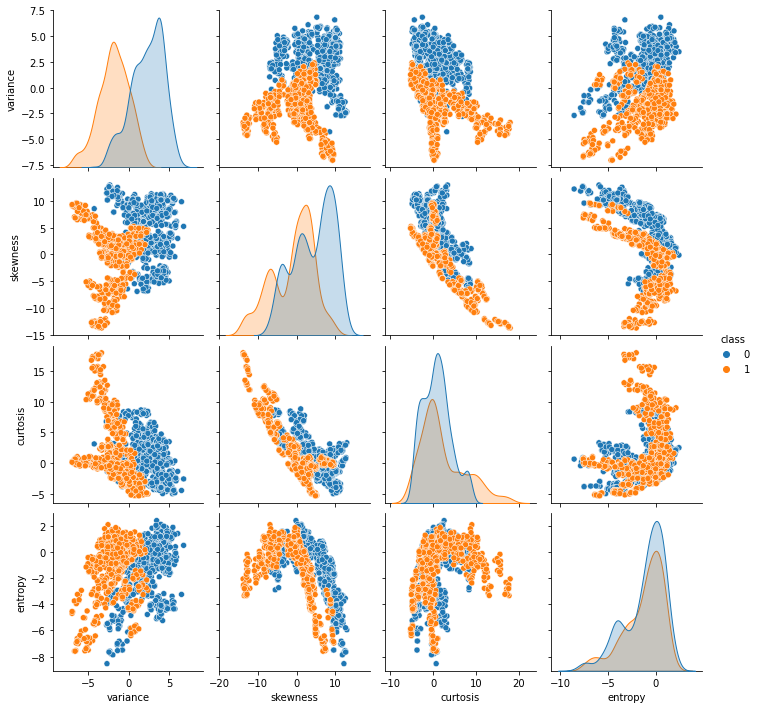

In [22]:
sns.pairplot(data=df, hue='class')

In [31]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [35]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [41]:
x_test

array([[-1.00056448,  1.72423499, -0.14705217, -2.89767805],
       [ 1.6502537 , -0.51894187, -0.19671344,  1.12624537],
       [-0.88051497, -1.59451161,  1.92063431,  0.66038649],
       ...,
       [ 0.75821114,  0.02873282,  0.13833597,  0.80050558],
       [ 1.43916185,  0.00714934, -0.06564241,  1.06277652],
       [-1.45559665,  0.15098707, -0.45142024, -1.04079966]])

## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [45]:
classifier = LogisticRegression(solver='liblinear', random_state=1)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [47]:
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)

In [48]:
print(accuracies)

[0.97272727 1.         0.98181818 1.         0.95454545 0.99090909
 0.97272727 0.97247706 0.99082569 0.95412844]


In [49]:
pred_accuracy = classifier.predict(x_test)

In [51]:
cm = metrics.confusion_matrix(y_test, pred_accuracy)

In [52]:
print(cm)

[[162   3]
 [  0 110]]


## SUPPORT VECTOR MACHINE(SVM)

In [53]:
from sklearn.svm import SVC

In [54]:
svm_classifier = SVC(kernel='linear')

In [55]:
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [56]:
pred = svm_classifier.predict(x_test)

In [60]:
cm2 = metrics.confusion_matrix(y_test, pred)

In [61]:
print(cm2)

[[162   3]
 [  0 110]]


## Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfc = RandomForestClassifier(n_estimators=50, criterion='entropy')

In [64]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [65]:
pred3 = rfc.predict(x_test)

In [66]:
cm3 = metrics.confusion_matrix(y_test, pred3)
print(cm3)

[[161   4]
 [  0 110]]


## K Nearest Neighbors Classifier(KNN)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

In [69]:
param_grid = {'leaf_size':[2,5,7,9,11], 'n_neighbors':[2,5,7,9,11], 'p':[1,2]}

In [70]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid)

In [72]:
grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [74]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [75]:
knn = KNeighborsClassifier(n_neighbors=2, p=1, leaf_size=2)

In [77]:
knn.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [78]:
pred = knn.predict(x_test)

In [79]:
cm3 = metrics.confusion_matrix(y_test, pred)

In [80]:
print(cm3)

[[164   1]
 [  0 110]]
